In [5]:
import numpy as np
import pylab as pl
import skimage.io as io

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [6]:
img = io.imread("kalbar_drone_190113-768x512.jpg")

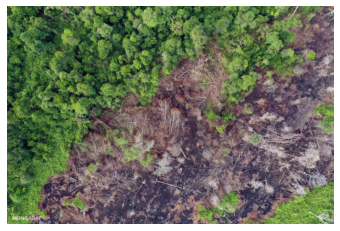

In [12]:
pl.imshow(img)
pl.axis('off');

In [9]:
from sklearn.cluster import KMeans

In [10]:
img.shape

(512, 768, 3)

In [11]:
from sklearn import preprocessing

In [13]:
XimgScaled = preprocessing.minmax_scale(img.reshape(img.shape[0] * img.shape[1], 3).astype(float), axis = 1)
# per orgni pixel in un array 1D si assegna un valore a R, G e B tra 0 e 1
# 1 per il colore che prevale, 0 per quello meno presente e un valore intermedio per il terzo canale

In [15]:
XimgScaled.reshape(img.shape)[0, 0] # esempio per un pixel

array([0.01694915, 1.        , 0.        ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


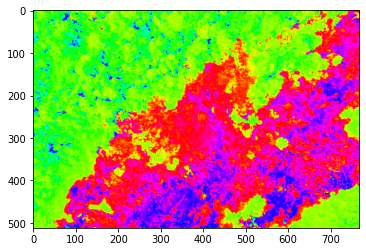

In [17]:
pl.imshow(XimgScaled.reshape(img.shape));

# 1

In [18]:
nclusters = 4

In [24]:
KMeans?

In [34]:
KMimg = KMeans(nclusters, random_state = 302)
# random_state: determines random number generation for centroid initialization.

In [35]:
KMimg.fit(XimgScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=302, tol=0.0001, verbose=0)

In [36]:
KMimg.cluster_centers_

array([[ 1.12466749e-01,  9.95313228e-01,  1.36237582e-01],
       [ 1.00000000e+00,  9.04999817e-02,  1.87731617e-01],
       [ 6.73565977e-01,  1.41564980e-02,  9.43149870e-01],
       [ 5.84431362e-01,  9.83308419e-01, -4.97046848e-13]])

nel primo cluster prevale il verde, nel secondo domina il rosso, nel quarto il blu non è praticamente presente

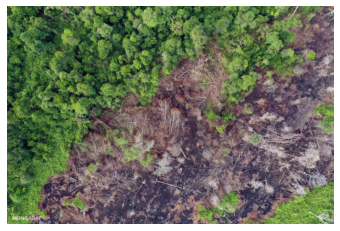

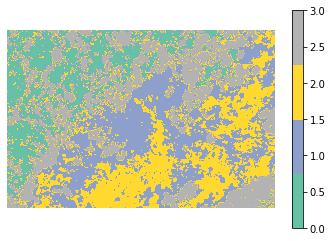

In [37]:
from matplotlib import cm
mycmap = cm.get_cmap('Set2', nclusters)

pl.figure() 
pl.imshow(img)
pl.axis('off');

pl.figure()
pl.imshow(KMimg.labels_.reshape(img.shape[:2]), cmap = mycmap)
pl.axis('off');
pl.colorbar()

In [38]:
print("fraction of vegetation pixel {:.3f}".format((KMimg.labels_ == 3).sum() / len(KMimg.labels_)))

fraction of vegetation pixel 0.312


# 2

In [39]:
myCenters = np.array([[ 1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]])
# si possono passare dei valori per i cluster, in questo caso R, G, B e bianco

In [40]:
KMimg = KMeans(nclusters, init = myCenters, random_state = 302)

In [41]:
KMimg.fit(XimgScaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  """Entry point for launching an IPython kernel.


KMeans(algorithm='auto', copy_x=True,
       init=array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 1, 1]]),
       max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=302, tol=0.0001, verbose=0)

In [42]:
KMimg.cluster_centers_

array([[ 1.00000000e+00,  9.02788223e-02,  1.87811461e-01],
       [ 1.21798448e-01,  9.95538363e-01,  1.30458774e-01],
       [ 6.73509773e-01,  1.42109451e-02,  9.43154614e-01],
       [ 5.91540906e-01,  9.82696502e-01, -4.91495733e-13]])

si ottengono cluster diversi rispetto a prima

In [43]:
KMimg.labels_[:10]
# cluster di appartenenza

array([1, 1, 3, 3, 1, 1, 1, 3, 3, 3], dtype=int32)

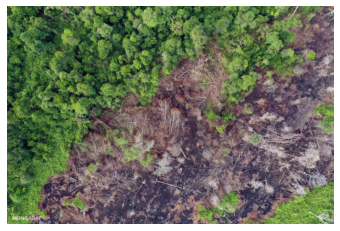

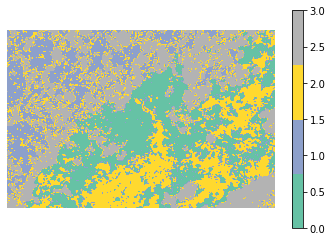

In [44]:
from matplotlib import cm
mycmap = cm.get_cmap('Set2', nclusters)

pl.figure() 
pl.imshow(img)
pl.axis('off');

pl.figure()
pl.imshow(KMimg.labels_.reshape(img.shape[:2]), cmap = mycmap)
pl.axis('off');
pl.colorbar()

In [45]:
print("fraction of vegetation pixel {:.3f}".format((KMimg.labels_ == 3).sum() / len(KMimg.labels_)))

fraction of vegetation pixel 0.305


si può rieseguire con un diverso numero di cluster salvando l'inertia (KMimg.inertia_) per vedere se si forma un gomito

# 3

In [46]:
nclusters = 2

In [47]:
KMimg = KMeans(nclusters, random_state = 302).fit(XimgScaled)

In [48]:
KMimg.cluster_centers_

array([[0.85975577, 0.052209  , 0.5159971 ],
       [0.40721353, 0.98463145, 0.05408461]])

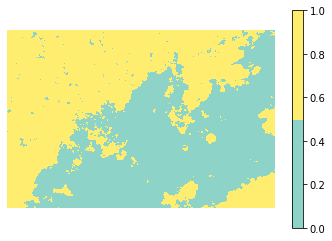

In [52]:
mycmap = cm.get_cmap('Set3', nclusters)
pl.imshow(KMimg.labels_.reshape(img.shape[:2]), cmap = mycmap)
pl.axis("off");
pl.colorbar();

In [53]:
print("fraction of vegetation pixel {:.3f}".format((KMimg.labels_ == 1).sum() / len(KMimg.labels_)))

fraction of vegetation pixel 0.510
